# Solving the n-Queens Problem using Local Search

Points: 10

## The n-Queens Problem

__Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

__State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector of length $n$, each number representing for one column (from left to write) the row the queen is located in. We will call a state a "board."

__Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).

The optimization problem is to find the optimal arrangement $a^*$ of $n$ queens on the board:

$$a^* = \mathrm{argmin}_a [ \mathrm{conflicts}(a) ]$$

$$\text{s.t.}\ a \ \text{contains only one queen per column}$$

Note that for this problem there is always an arrangement $a^*$ with $\mathrm{conflicts}(a) = 0$. 

__Local move:__ Move one queen to a different position in its column.

## Helper functions


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n-1, size = n))


def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""
    
    board = np.array(board)
    
    n = len(board)
    conflicts = 0

    # check horizontal (we do not check vertical since the state space is restricted to one queen per col)
    for i in range(n): conflicts += nCr(np.sum(board == i), 2)
    #print(f"Horizontal conflicts: {conflicts}")
    
    # check for each queen diagonally up and down (only to the right side of the queen)
    for j in range(n):
        q_up = board[j]
        q_down = board[j]
     
        for jj in range(j+1, n):
            q_up -= 1
            q_down += 1
            if board[jj] == q_up: conflicts += 1
            if board[jj] == q_down: conflicts += 1
        #print(f"Conflicts after queen {j}: {conflicts}")
       
    return(conflicts)
        

def show_board(board, cols = ['white', 'gray']):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: 1 and j are switched. Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = 48, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()
    
def nCr(n, k):
    #Evaluates to n! / (k! * (n - k)!) when k <= n and evaluates to zero when k > n.
    if k <= n:
        return int(math.factorial(n) / (math.factorial(k) * math.factorial(n-k)))
    else:
        return 0

## Create a board

Board with 4 conflicts.


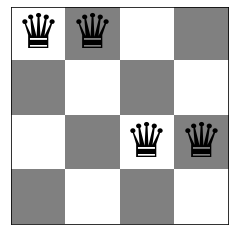

Queens (left to right) are at rows: [0 0 2 2]
Number of conflicts: 4


In [30]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

In [ ]:
board = [1,3,0,2]
show_board(board)

## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

Board with 3 conflicts.


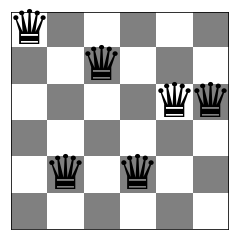

2 LESS CONFLICTS
Board with 1 conflicts.


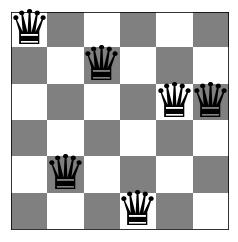

Board with 1 conflicts.


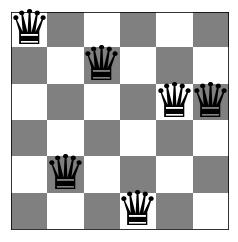

FINAL AMOUNT OF CONFLICTS: 1


In [84]:
def SAHC(n=6):
    board = random_board(n)
    show_board(board)
    conflictsV = conflicts(board)
    lowestConflicts = 0
    while lowestConflicts <= conflictsV:
        lowestConflicts = conflictsV
        changeRowToIndex = (-1, -1)
        for index, x in enumerate(board):
            og = (index, x)
            for i in range(n):
                board[index] = i
                if conflicts(board) < lowestConflicts:
                    changeRowToIndex = (index, i)
                    lowestConflicts = conflicts(board)
            board[og[0]] = og[1]
        if changeRowToIndex != (-1, -1):
            board[changeRowToIndex[0]] = changeRowToIndex[1]
            print("{} LESS CONFLICTS".format(conflictsV - conflicts(board)))
            conflictsV = conflicts(board)
        else:
            show_board(board)
            print("FINAL AMOUNT OF CONFLICTS:", conflicts(board))
            break
        show_board(board)
    return board

b = SAHC()

Steepest Ascent Hill Climbing guarantees a local optimum but not a global optimum.

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend hill climbing will often end up in local optima. Restart the algorithm up to 100 times with a random board to find a better (hopefully optimal) solution.   

Board with 4 conflicts.


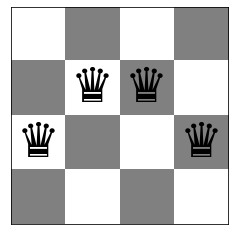

1 LESS CONFLICTS
Board with 3 conflicts.


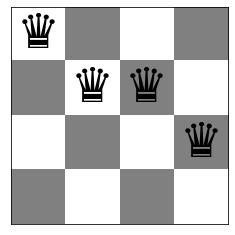

2 LESS CONFLICTS
Board with 1 conflicts.


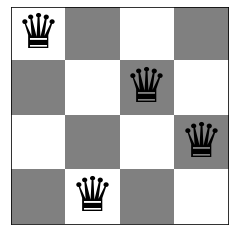

Board with 1 conflicts.


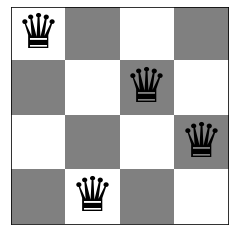

FINAL AMOUNT OF CONFLICTS: 1
1
Board with 2 conflicts.


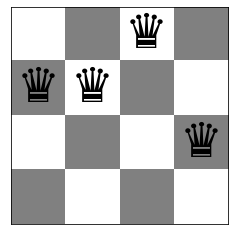

2 LESS CONFLICTS
Board with 0 conflicts.


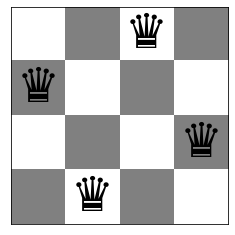

Board with 0 conflicts.


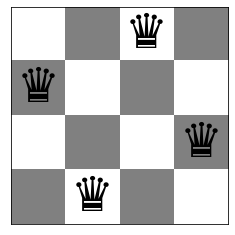

FINAL AMOUNT OF CONFLICTS: 0
0
Board with 3 conflicts.


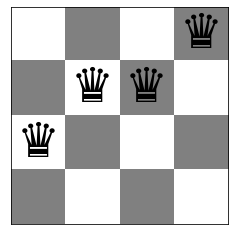

2 LESS CONFLICTS
Board with 1 conflicts.


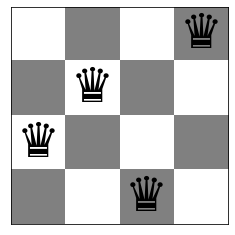

Board with 1 conflicts.


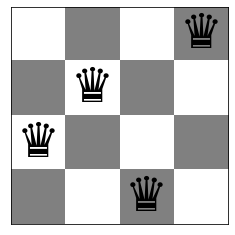

FINAL AMOUNT OF CONFLICTS: 1
1
Board with 3 conflicts.


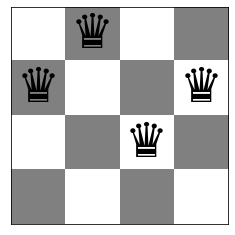

2 LESS CONFLICTS
Board with 1 conflicts.


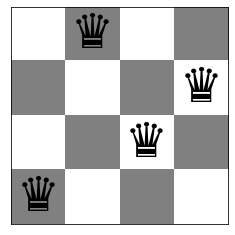

Board with 1 conflicts.


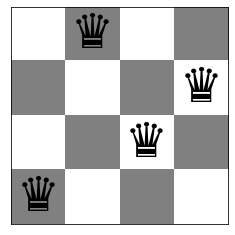

FINAL AMOUNT OF CONFLICTS: 1
1
Board with 5 conflicts.


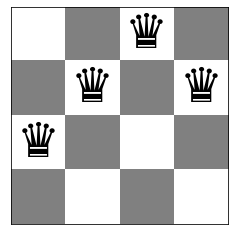

3 LESS CONFLICTS
Board with 2 conflicts.


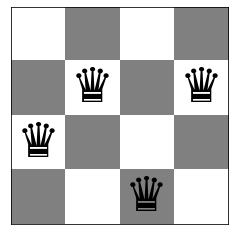

2 LESS CONFLICTS
Board with 0 conflicts.


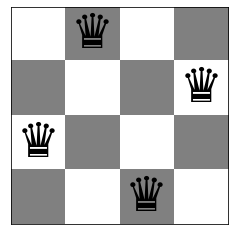

Board with 0 conflicts.


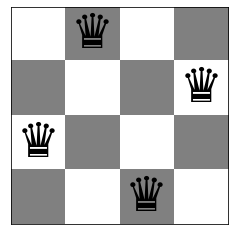

FINAL AMOUNT OF CONFLICTS: 0
0
Board with 4 conflicts.


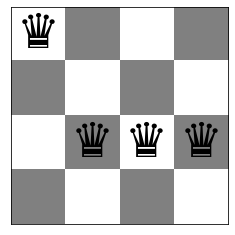

2 LESS CONFLICTS
Board with 2 conflicts.


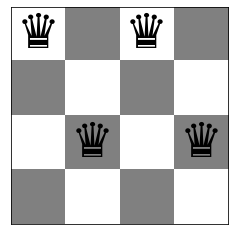

1 LESS CONFLICTS
Board with 1 conflicts.


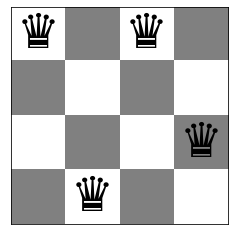

1 LESS CONFLICTS
Board with 0 conflicts.


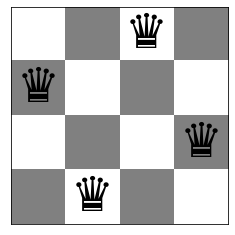

Board with 0 conflicts.


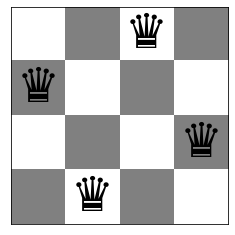

FINAL AMOUNT OF CONFLICTS: 0
0
Board with 3 conflicts.


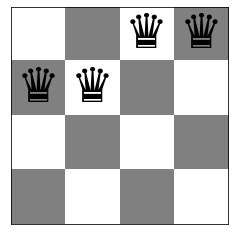

2 LESS CONFLICTS
Board with 1 conflicts.


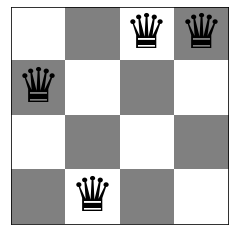

1 LESS CONFLICTS
Board with 0 conflicts.


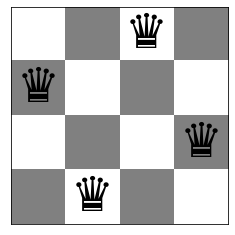

Board with 0 conflicts.


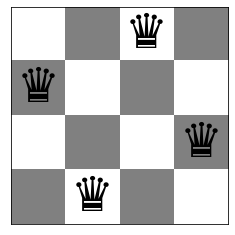

FINAL AMOUNT OF CONFLICTS: 0
0
Board with 2 conflicts.


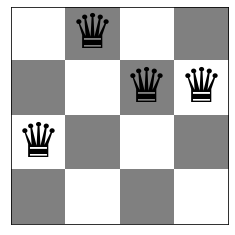

2 LESS CONFLICTS
Board with 0 conflicts.


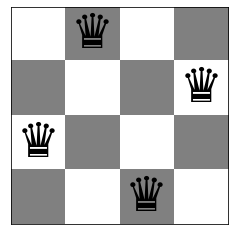

Board with 0 conflicts.


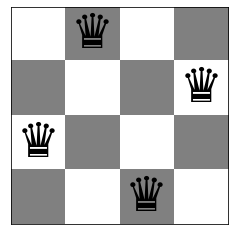

FINAL AMOUNT OF CONFLICTS: 0
0
Board with 3 conflicts.


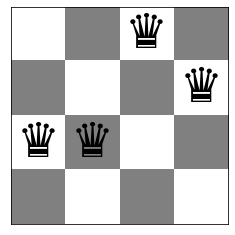

1 LESS CONFLICTS
Board with 2 conflicts.


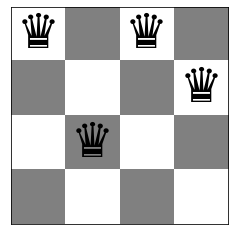

1 LESS CONFLICTS
Board with 1 conflicts.


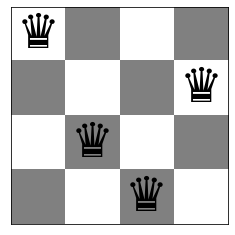

Board with 1 conflicts.


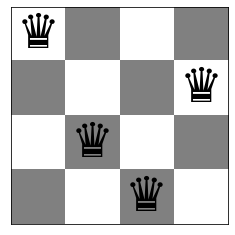

FINAL AMOUNT OF CONFLICTS: 1
1
Board with 3 conflicts.


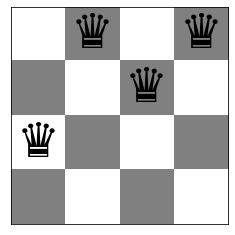

2 LESS CONFLICTS
Board with 1 conflicts.


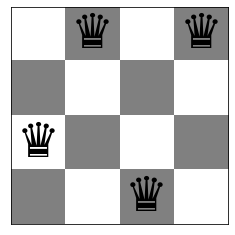

1 LESS CONFLICTS
Board with 0 conflicts.


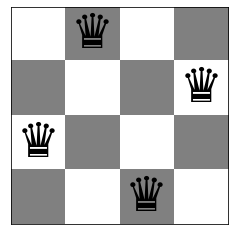

Board with 0 conflicts.


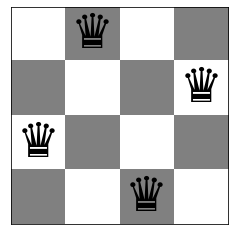

FINAL AMOUNT OF CONFLICTS: 0
0
Board with 4 conflicts.


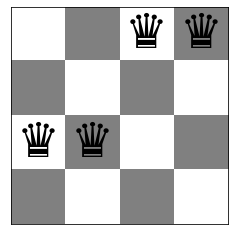

2 LESS CONFLICTS
Board with 2 conflicts.


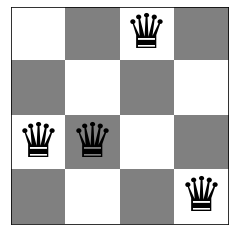

1 LESS CONFLICTS
Board with 1 conflicts.


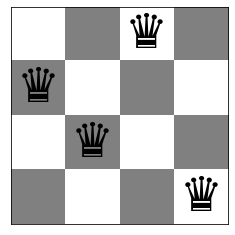

Board with 1 conflicts.


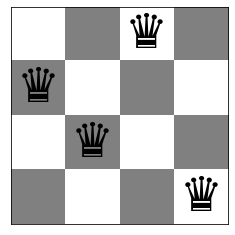

FINAL AMOUNT OF CONFLICTS: 1
1
Board with 5 conflicts.


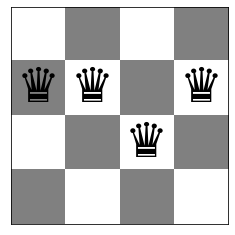

3 LESS CONFLICTS
Board with 2 conflicts.


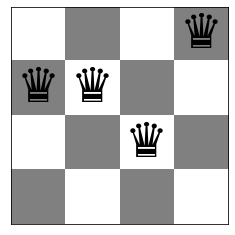

1 LESS CONFLICTS
Board with 1 conflicts.


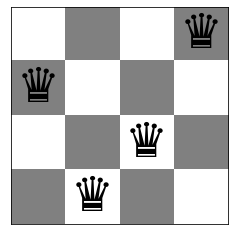

Board with 1 conflicts.


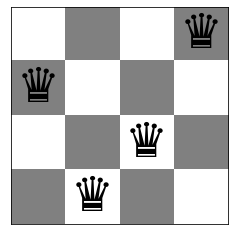

FINAL AMOUNT OF CONFLICTS: 1
1
Board with 4 conflicts.


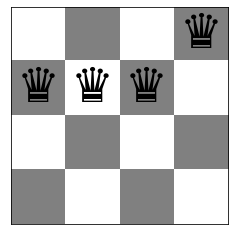

2 LESS CONFLICTS
Board with 2 conflicts.


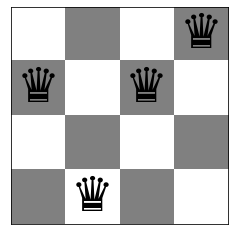

1 LESS CONFLICTS
Board with 1 conflicts.


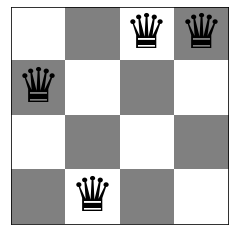

1 LESS CONFLICTS
Board with 0 conflicts.


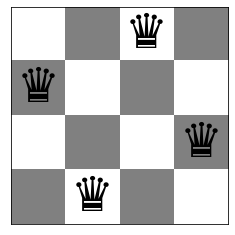

Board with 0 conflicts.


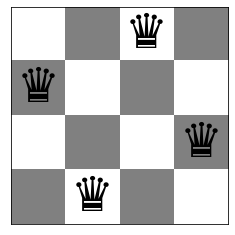

FINAL AMOUNT OF CONFLICTS: 0
0
Board with 5 conflicts.


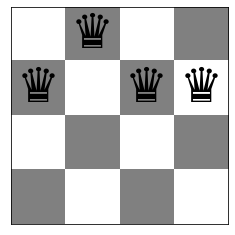

3 LESS CONFLICTS
Board with 2 conflicts.


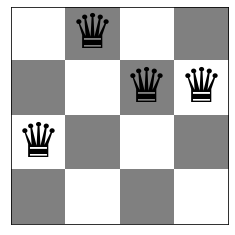

2 LESS CONFLICTS
Board with 0 conflicts.


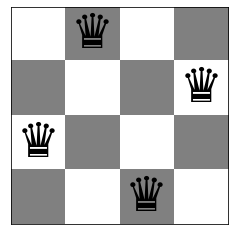

Board with 0 conflicts.


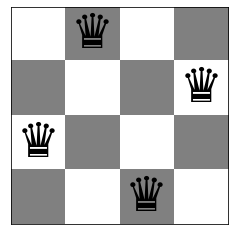

FINAL AMOUNT OF CONFLICTS: 0
0
Board with 3 conflicts.


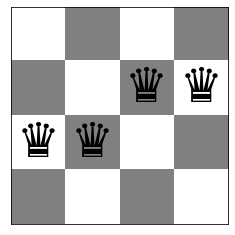

1 LESS CONFLICTS
Board with 2 conflicts.


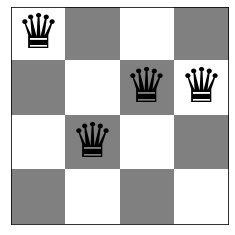

1 LESS CONFLICTS
Board with 1 conflicts.


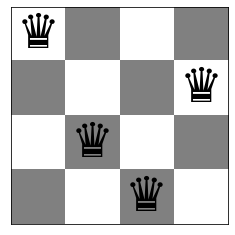

Board with 1 conflicts.


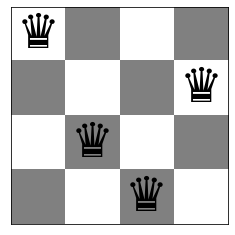

FINAL AMOUNT OF CONFLICTS: 1
1
Board with 4 conflicts.


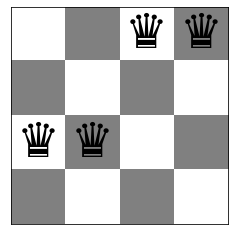

2 LESS CONFLICTS
Board with 2 conflicts.


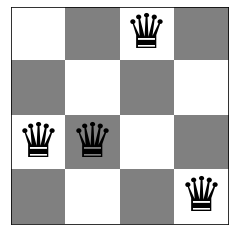

1 LESS CONFLICTS
Board with 1 conflicts.


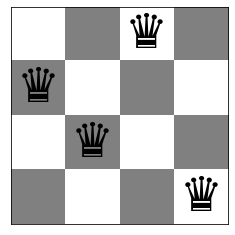

Board with 1 conflicts.


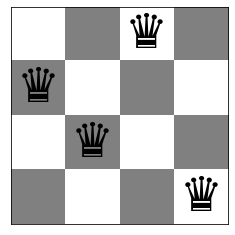

FINAL AMOUNT OF CONFLICTS: 1
1
Board with 4 conflicts.


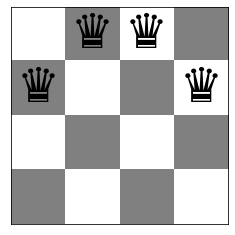

2 LESS CONFLICTS
Board with 2 conflicts.


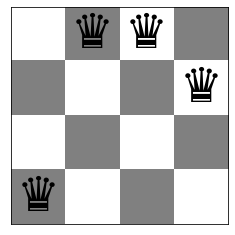

1 LESS CONFLICTS
Board with 1 conflicts.


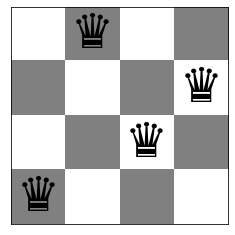

Board with 1 conflicts.


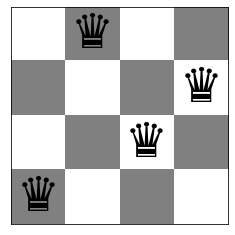

FINAL AMOUNT OF CONFLICTS: 1
1
Board with 5 conflicts.


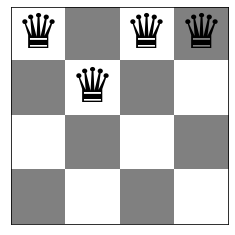

3 LESS CONFLICTS
Board with 2 conflicts.


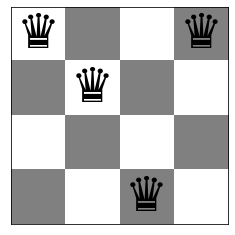

1 LESS CONFLICTS
Board with 1 conflicts.


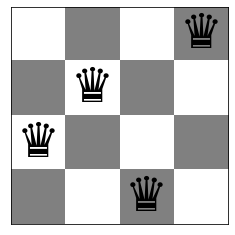

Board with 1 conflicts.


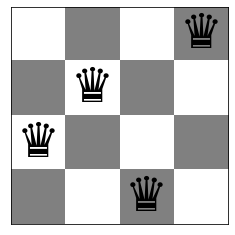

FINAL AMOUNT OF CONFLICTS: 1
1
Board with 4 conflicts.


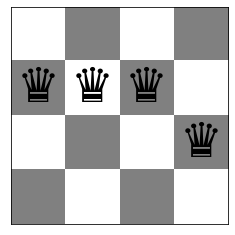

2 LESS CONFLICTS
Board with 2 conflicts.


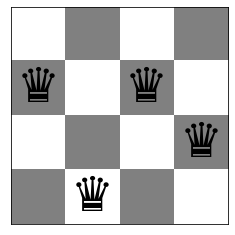

2 LESS CONFLICTS
Board with 0 conflicts.


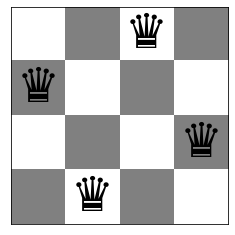

Board with 0 conflicts.


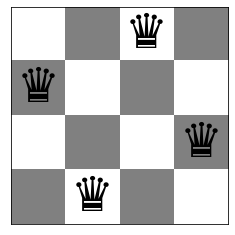

FINAL AMOUNT OF CONFLICTS: 0
0
Board with 6 conflicts.


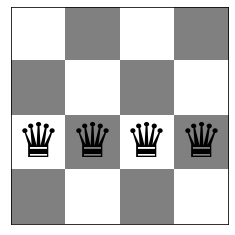

2 LESS CONFLICTS
Board with 4 conflicts.


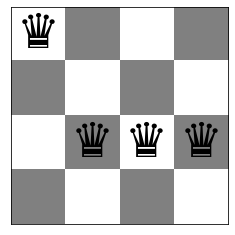

2 LESS CONFLICTS
Board with 2 conflicts.


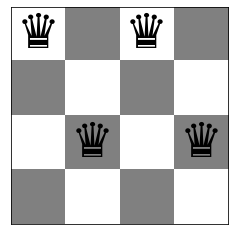

1 LESS CONFLICTS
Board with 1 conflicts.


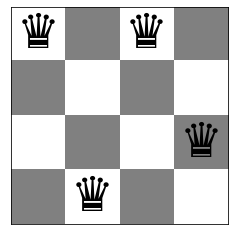

1 LESS CONFLICTS
Board with 0 conflicts.


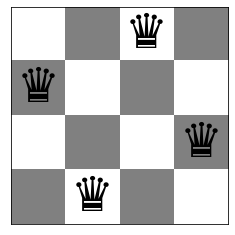

Board with 0 conflicts.


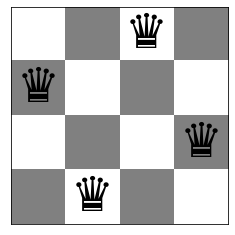

FINAL AMOUNT OF CONFLICTS: 0
0
MEAN CONFLICTS: 0.5


In [88]:
def SAHCRR(n=4, restarts=20, optimal=True, statistical=False):
    '''Use random restarts after finding local optimum to reset board and try again until goal or matched steps is reached'''
    goal = 0 # no conflicts
    cheapestBoard = None
    allBoards = []
    for i in range(restarts):
        board = random_board(n)
        show_board(board)
        conflictsV = conflicts(board)
        lowestConflicts = 0
        while lowestConflicts <= conflictsV:
            lowestConflicts = conflictsV
            changeRowToIndex = (-1, -1)
            for index, x in enumerate(board):
                og = (index, x)
                for i in range(n):
                    board[index] = i
                    if conflicts(board) < lowestConflicts:
                        changeRowToIndex = (index, i)
                        lowestConflicts = conflicts(board)
                board[og[0]] = og[1]
            if changeRowToIndex != (-1, -1):
                board[changeRowToIndex[0]] = changeRowToIndex[1]
                print("{} LESS CONFLICTS".format(conflictsV - conflicts(board)))
                conflictsV = conflicts(board)
            else:
                show_board(board)
                print("FINAL AMOUNT OF CONFLICTS:", conflicts(board))
                break
            show_board(board)
        print(conflicts(board))
        #print(conflicts(cheapestBoard))
        if cheapestBoard is None or conflicts(board) < conflicts(cheapestBoard):
            cheapestBoard = board
            if conflicts(cheapestBoard) == goal and optimal is True:
                return cheapestBoard
        allBoards.append(board)

    if statistical:
        meanConflicts = np.mean([conflicts(x) for x in allBoards])
        print("MEAN CONFLICTS:", meanConflicts)
    return allBoards

d = SAHCRR(4)


## Stochastic Hill Climbing [1 Point]

Chooses randomly from among all uphill moves.

Board with 2 conflicts.


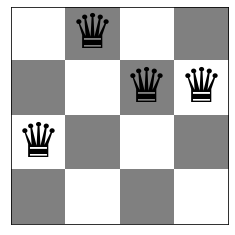

[(2, 3), (3, 3)]
2 LESS CONFLICTS
Board with 0 conflicts.


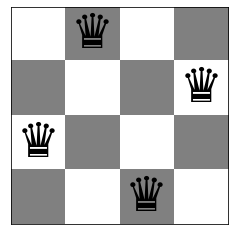

Board with 0 conflicts.


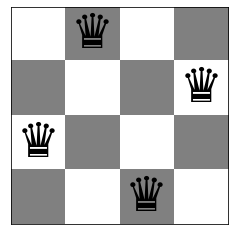

FINAL AMOUNT OF CONFLICTS: 0


array([2, 0, 3, 1])

In [10]:
def SHC(n=6):
    '''Randomly choose from all improving moves until stuck'''
    board = random_board(n)
    show_board(board)
    conflictsV = conflicts(board)
    lowestConflicts = 0
    while lowestConflicts <= conflictsV:
        allImprovingMoves = []
        for index, x in enumerate(board):
            og = (index, x)
            for i in range(n):
                board[index] = i
                if conflicts(board) < conflictsV:
                    allImprovingMoves.append((index, i))
            board[og[0]] = og[1]
        if allImprovingMoves:
            # pick random tuple from list to adjust
            indexToLoc = np.random.choice(list(range(len(allImprovingMoves))))
            board[allImprovingMoves[indexToLoc][0]] = allImprovingMoves[indexToLoc][1]
            print("{} LESS CONFLICTS".format(conflictsV - conflicts(board)))
            conflictsV = conflicts(board)
        else:
            show_board(board)
            print("FINAL AMOUNT OF CONFLICTS:", conflicts(board))
            break
        show_board(board)
    return board

SHC(4)

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

In [7]:
# Code goes here

## Simulated Annealing [2 Points]

You have to experiment with the annealing schedule.

In [8]:
# Code goes here

## Compare Performance [2 Points]

Use runtime, scalability, and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [9]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.21195411682128906 milliseconds


In [10]:
# Code and results go here

## Bonus: Genetic Algorithm [+1 Point]

In [11]:
# Code goes here